# Tarefa: Redes Convolucional CIFAR-10

## Etapa 1: Importação das bibliotecas

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'1.4.0'

## Etapa 2: Base de dados

In [ ]:
torch.manual_seed(123)

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train = datasets.CIFAR10(root = '.', train = True, download = True, transform = transform)
test = datasets.CIFAR10(root = '.', train = False, download = True, transform = transform)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


Text(0.5, 1.0, 'Classe frog')

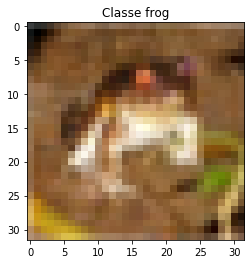

In [ ]:
plt.imshow(train.data[0])
plt.title('Classe ' + str(train.classes[train.targets[0]]))

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 128)
test_loader = torch.utils.data.DataLoader(test, batch_size = 128)

## Etapa 3: Construção do modelo

In [ ]:
class classificador(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3))
        self.conv2 = nn.Conv2d(32, 32, (3, 3))
  
        self.activation = nn.ReLU()
        self.bnorm = nn.BatchNorm2d(num_features = 32)
        self.pool = nn.MaxPool2d(kernel_size = (2, 2))
        self.flatten = nn.Flatten()
        
        self.linear1 = nn.Linear(in_features = 32*6*6, out_features = 128)
        self.linear2 = nn.Linear(128, 128)
        self.output = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, X):
        X = self.pool(self.bnorm(self.activation(self.conv1(X))))
        X = self.pool(self.bnorm(self.activation(self.conv2(X))))
        X = self.flatten(X)
        
        X = self.dropout(self.activation(self.linear1(X)))
        X = self.dropout(self.activation(self.linear2(X)))
        X = self.output(X)

        return X

In [ ]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

## Etapa 4: Treinamento do modelo

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available else torch.devide('cpu')
device

device(type='cuda')

In [ ]:
net.to(device)

classificador(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten()
  (linear1): Linear(in_features=1152, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.

    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()        

        outputs = net(inputs)
        top_p, top_class = outputs.topk(k = 1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)

        accuracy = torch.mean(equals.type(torch.float))
        running_accuracy += accuracy
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()

        running_loss += loss.item()
        
        # Imprimindo os dados referentes a esse loop
        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: perda {:03.2f} - precisão {:03.2f}'.format(epoch + 1, i + 1, len(loader), loss, accuracy), end = '\r')

    # Imprimindo os dados referentes a essa época
    print('\rÉPOCA {:3d} FINALIZADA: perda {:.5f} - precisão {:.5f}'.format(epoch + 1, running_loss/len(loader), running_accuracy/len(loader)))


In [ ]:
for epoch in range(5):
    print('Treinando...')
    training_loop(train_loader, epoch)

    net.eval()
    print('Validando...')
    training_loop(test_loader, epoch)

    net.train()

Treinando...
ÉPOCA   1 FINALIZADA: perda 1.36573 - precisão 0.50751
Validando...
ÉPOCA   1 FINALIZADA: perda 1.40255 - precisão 0.50880
Treinando...
ÉPOCA   2 FINALIZADA: perda 1.03475 - precisão 0.63515
Validando...
ÉPOCA   2 FINALIZADA: perda 1.23053 - precisão 0.56784
Treinando...
ÉPOCA   3 FINALIZADA: perda 0.90209 - precisão 0.68572
Validando...
ÉPOCA   3 FINALIZADA: perda 1.08693 - precisão 0.61699
Treinando...
ÉPOCA   4 FINALIZADA: perda 0.81268 - precisão 0.71481
Validando...
ÉPOCA   4 FINALIZADA: perda 1.03529 - precisão 0.62836
Treinando...
ÉPOCA   5 FINALIZADA: perda 0.74734 - precisão 0.73939
Validando...
ÉPOCA   5 FINALIZADA: perda 0.94222 - precisão 0.66723
